# Projeto de Transfer Learning em Python

Desafio do curso BairesDev - Machine Learning Practitioner na plataforma DIO

In [1]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import shutil
import tensorflow as tf


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [2]:
# Download do Dataset - Cats And Dogs

!echo "Downloading kagglecatsanddogs_5340 for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip kagglecatsanddogs_5340.zip
!rm kagglecatsanddogs_5340.zip
!ls

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/55

In [3]:
# Criando as pastas de treino e teste

os.mkdir('catsanddogs')
os.mkdir('catsanddogs/training')
os.mkdir('catsanddogs/testing')
os.mkdir('catsanddogs/training/cats')
os.mkdir('catsanddogs/training/dogs')
os.mkdir('catsanddogs/testing/cats')
os.mkdir('catsanddogs/testing/dogs')

In [4]:
# Função para seprar imagens de em treino e teste

def split_data(data, training, testing, split):
  files = []
  for filename in os.listdir(data):
    file = data + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * split)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = data + filename
    destination = training + filename
    shutil.copyfile(this_file, destination)

  for filename in testing_set:
    this_file = data + filename
    destination = testing + filename
    shutil.copyfile(this_file, destination)


cat_data_dir = "PetImages/Cat/"
training_cats_dir = "catsanddogs/training/cats/"
testing_cats_dir = "catsanddogs/testing/cats/"
dog_data_dir = "PetImages/Dog/"
training_dogs_dir = "catsanddogs/training/dogs/"
testing_dogs_dir = "catsanddogs/testing/dogs/"

split = .9
split_data(cat_data_dir, training_cats_dir, testing_cats_dir, split)
split_data(dog_data_dir, training_dogs_dir, testing_dogs_dir, split)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [5]:
# Quantidade de imagem por pasta

print(len(os.listdir('catsanddogs/training/cats/')))
print(len(os.listdir('catsanddogs/training/dogs/')))
print(len(os.listdir('catsanddogs/testing/cats/')))
print(len(os.listdir('catsanddogs/testing/dogs/')))

11250
11250
1250
1250


In [6]:
# Altera o diretório de trabalho

datasetdir = '/content/PetImages'
os.chdir(datasetdir)

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

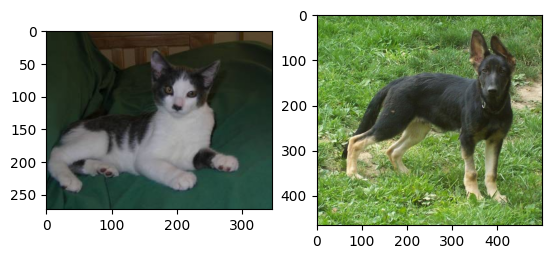

In [7]:
plt.subplot(1,2,1)
plt.imshow(img.imread('Cat/123.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('Dog/321.jpg'))

In [8]:
images = []
for i in range(10):
  im = img.imread('Cat/123.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187
image shape (273, 345, 3) maximum color level 187


In [9]:
# Função que carrega e processa uma imagem para ser usada no modelo de deep learning

def get_image(path):
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return img, x

In [10]:
# Transformar imagens em lotes de matrizes de dados

gen = ImageDataGenerator()

# Iniciar geração de lotes

iterator = gen.flow_from_directory(
  os.getcwd(),
  target_size=(256,256),
  classes=('Dog','Cat')
)

Found 25000 images belonging to 2 classes.


In [11]:
batch = next(iterator)
len(batch)

2

In [12]:
print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

# array de 32 imagens, 256x256 com 3 canais de cores
# codificados como floats no intervalo de 0 a 255

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


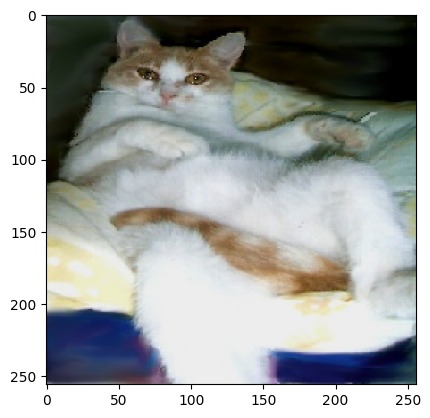

In [14]:
plt.imshow(batch[0][0].astype(int))

In [15]:
batch[1][0]

array([0., 1.], dtype=float32)

In [16]:
def plot_images(batch):
  imgs = batch[0]
  labels = batch[1]
  ncols, nrows = 4,8
  fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
  for i, (img,label) in enumerate(zip(imgs,labels)):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img.astype(int))
    assert(label[0]+label[1]==1.)
    categ = 'Dog' if label[0]>0.5 else 'Cat'
    plt.title( '{} {}'.format(str(label), categ))
    plt.axis('off')

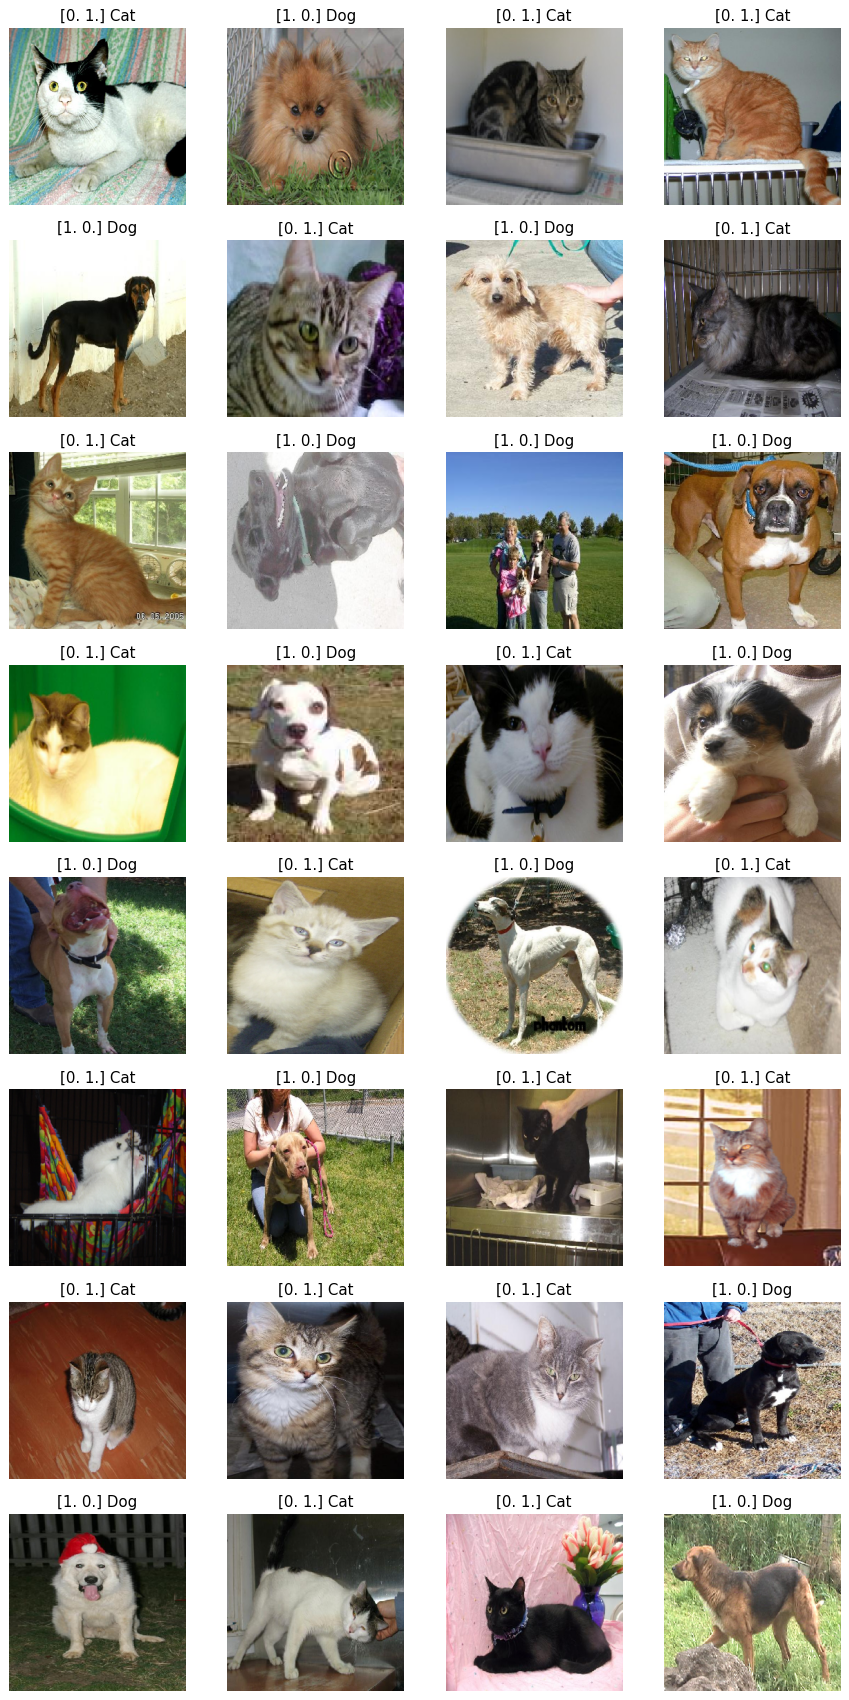

In [17]:
plot_images(next(iterator))

In [18]:
# Treinando o conjunto de dados

imgdatagen = ImageDataGenerator(
  rescale = 1/255.,
  validation_split = 0.2,
)

batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/catsanddogs/training/"
train_dataset = imgdatagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (height, width),
  classes = ('dogs','cats'),
  batch_size = batch_size,
  subset = 'training'
)

VALIDATION_DIR = "/content/catsanddogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (height, width),
  classes = ('dogs','cats'),
  batch_size = batch_size,
  subset = 'validation'
)

Found 18000 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [19]:
model = keras.models.Sequential()

initializers = {}
model.add(keras.layers.Conv2D(24, 5, input_shape=(256,256,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(48, 5, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(96, 5, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 24)        │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 24)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 48)        │          28,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 96)          │         115,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         623,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2201/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5913 - loss: 0.6576

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 63s 25ms/step - acc: 0.5927 - loss: 0.6567 - val_acc: 0.7715 - val_loss: 0.4904
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - acc: 0.7407 - loss: 0.5226 - val_acc: 0.7936 - val_loss: 0.4377
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - acc: 0.7813 - loss: 0.4684 - val_acc: 0.8437 - val_loss: 0.3885
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - acc: 0.8075 - loss: 0.4243 - val_acc: 0.8277 - val_loss: 0.3797
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - acc: 0.8255 - loss: 0.3888 - val_acc: 0.8537 - val_loss: 0.3500
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - acc: 0.8435 - loss: 0.3604 - val_acc: 0.8537 - val_loss: 0.3456
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - acc: 0.8481 - loss: 0.3499 - val_acc: 0.8617 - val_loss: 0.3117
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - acc: 0.8608 - loss: 0.3150 - val_acc: 0.8798 - val_loss: 0.2881
Epoch 9/10
2250/2250 ━━━━━━━━━━━━━━

In [31]:
# Mostrando resultado do treinamento

def plot_history(history, yrange):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')
  plt.ylim(yrange)

  plt.figure()

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

  plt.show()

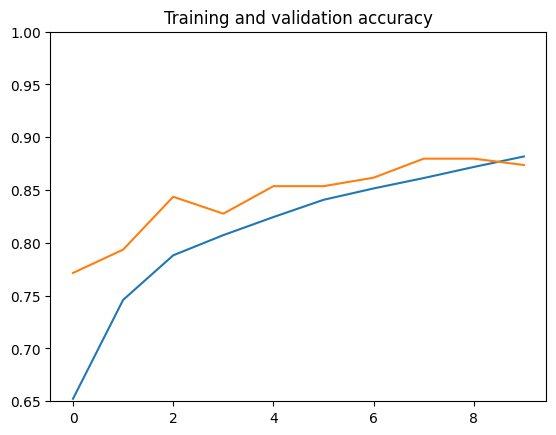

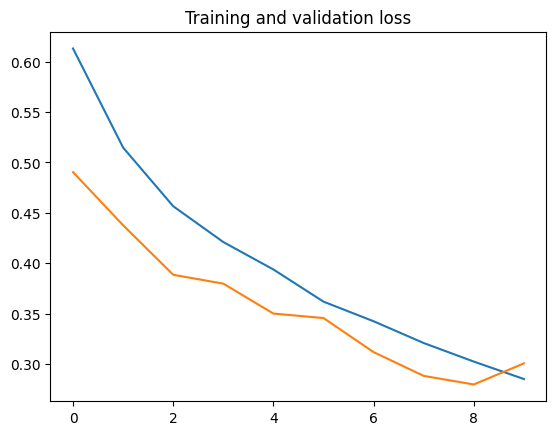

In [32]:
plot_history(history, (0.65, 1.))

In [33]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    validation_split = 0.2,
)

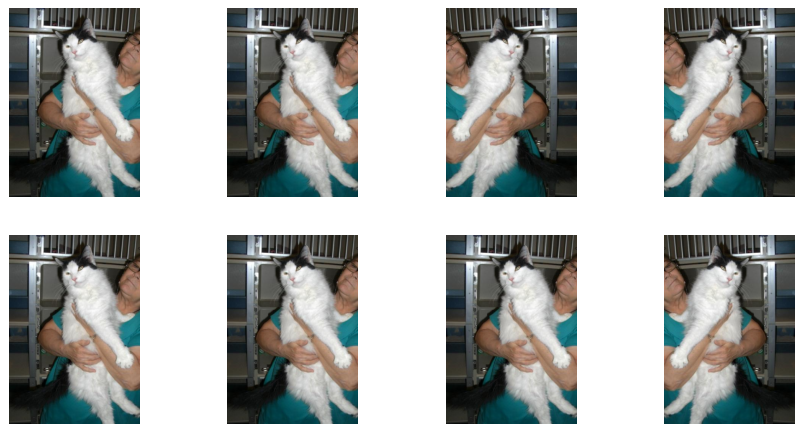

In [34]:
image = img.imread('Cat/25.jpg')

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols):
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')

plot_transform()

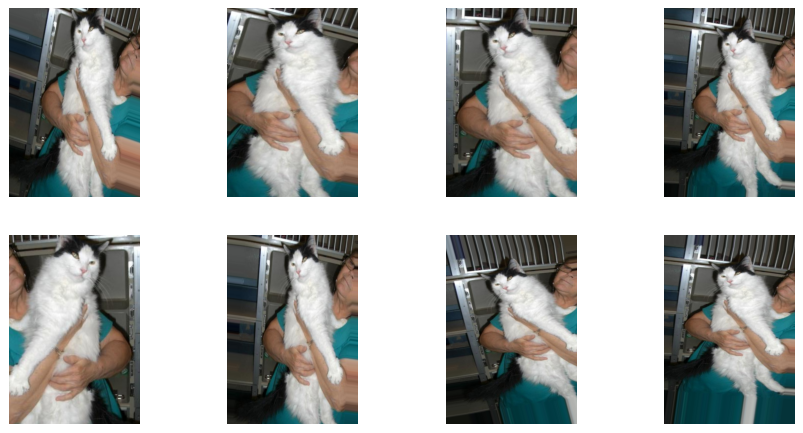

In [35]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    zoom_range = 0.3,
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [36]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/catsanddogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/catsanddogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20250 images belonging to 2 classes.
Found 249 images belonging to 2 classes.


In [37]:
model = keras.models.Sequential()

initializers = {

}
model.add(
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        48, 5, activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        96, 5, activation='relu',
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 252, 252, 24)        │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 126, 126, 24)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 48)        │          28,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 61, 61, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 57, 57, 96)          │         115,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │         623,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [42]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

Epoch 1/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 327s 129ms/step - acc: 0.8300 - loss: 0.3821 - val_acc: 0.8635 - val_loss: 0.3051
Epoch 2/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 329s 130ms/step - acc: 0.8398 - loss: 0.3579 - val_acc: 0.8434 - val_loss: 0.3508
Epoch 3/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 330s 130ms/step - acc: 0.8487 - loss: 0.3473 - val_acc: 0.8434 - val_loss: 0.3049


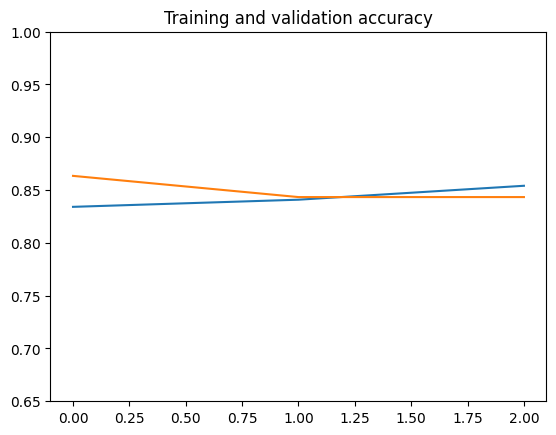

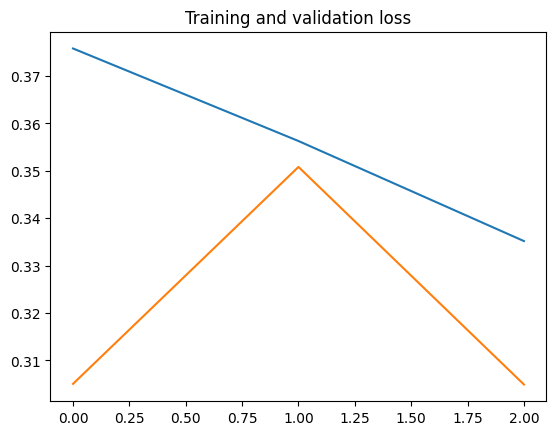

In [43]:
plot_history(history, (0.65, 1))

In [44]:
# Modelo pré-treinado: VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [45]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=5)[0])
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: [('n02088632', 'bluetick', np.float32(0.41637143)), ('n02089867', 'Walker_hound', np.float32(0.21543606)), ('n02088238', 'basset', np.float32(0.10916945)), ('n02089973', 'English_foxhound', np.float32(0.045593485)), ('n02108000', 'EntleBucher', np.float32(0.027354196))]


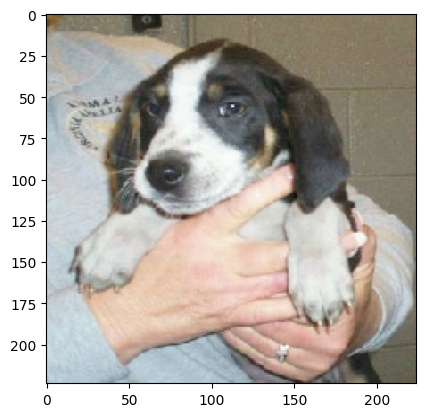

In [47]:
evaluate('/content/PetImages/Dog/10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: [('n02106030', 'collie', np.float32(0.22014771)), ('n02106166', 'Border_collie', np.float32(0.19835348)), ('n02091831', 'Saluki', np.float32(0.092149474)), ('n02088094', 'Afghan_hound', np.float32(0.068762645)), ('n02107683', 'Bernese_mountain_dog', np.float32(0.055500183))]


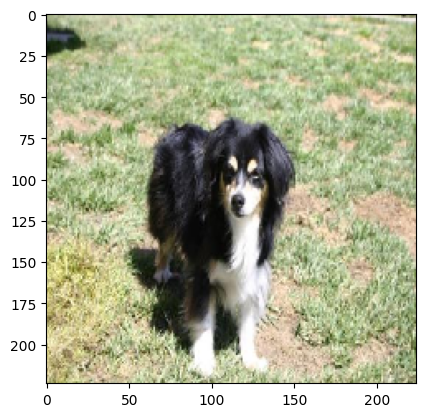

In [48]:
evaluate('/content/PetImages/Dog/20.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted: [('n02123045', 'tabby', np.float32(0.47578192)), ('n02123159', 'tiger_cat', np.float32(0.21211606)), ('n02123394', 'Persian_cat', np.float32(0.12305605)), ('n02124075', 'Egyptian_cat', np.float32(0.030512638)), ('n02127052', 'lynx', np.float32(0.019988896))]


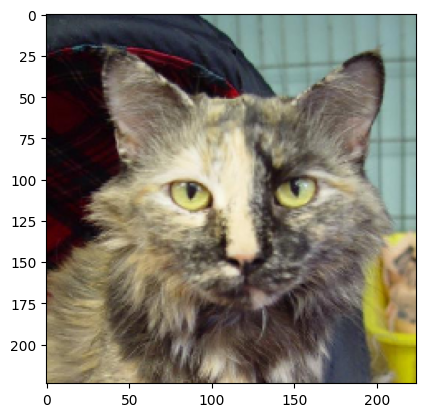

In [49]:
evaluate('/content/PetImages/Cat/10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: [('n02123597', 'Siamese_cat', np.float32(0.99593437)), ('n04493381', 'tub', np.float32(0.0008934273)), ('n02808440', 'bathtub', np.float32(0.0007514506)), ('n04447861', 'toilet_seat', np.float32(0.0006663918)), ('n03887697', 'paper_towel', np.float32(0.00056401355))]


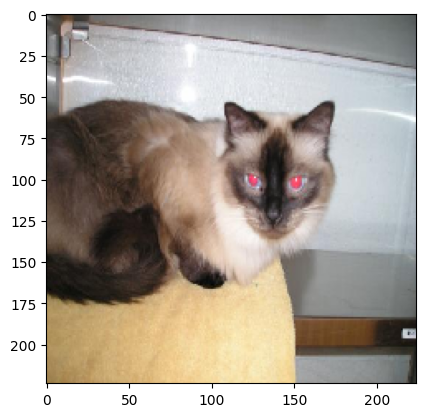

In [50]:
evaluate('/content/PetImages/Cat/20.jpg')